In [1]:
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scanpy as sc

In [3]:
from anndata import AnnData

In [4]:
import os

In [5]:
from scipy.sparse import load_npz

In [6]:
from scipy import sparse

In [7]:
import scvi

In [ ]:
data = ad.read_h5ad('K562_gwps_normalized_singlecell_01.h5ad')

In [4]:
data.obs.head()

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,core_scale_factor,core_adjusted_UMI_count
cell_barcode,,,,,,,,,,,
AAACCCAAGAAACCAT-157,157,CTSC,ENSG00000109861,P1P2,1946_CTSC_P1P2_ENSG00000109861,CTSC_-_88070848.23-P1P2|CTSC_-_88070918.23-P1P2,0.088177,14709.0,0.470687,1.051176,13992.900391
AAACCCAAGAAACCAT-207,207,CWC25,ENSG00000273559,P1P2,1973_CWC25_P1P2_ENSG00000273559,CWC25_+_36981555.23-P1P2|CWC25_+_36981567.23-P1P2,0.114342,16162.0,0.824790,1.074744,15038.004883
AAACCCAAGAAACCAT-29,29,PDE4DIP,ENSG00000178104,ENST00000313431.9,6168_PDE4DIP_ENST00000313431.9_ENSG00000178104,PDE4DIP_+_144932474.23-ENST00000313431.9|PDE4D...,0.107157,33297.0,2.627126,1.472444,22613.423828
AAACCCAAGAAAGCGA-149,149,ZZEF1,ENSG00000074755,P1P2,10745_ZZEF1_P1P2_ENSG00000074755,ZZEF1_+_4046247.23-P1P2|ZZEF1_+_4046255.23-P1P2,0.143107,7435.0,0.918149,0.480401,15476.669922
AAACCCAAGAAATCCA-172,172,SNAPIN,ENSG00000143553,P1P2,8210_SNAPIN_P1P2_ENSG00000143553,SNAPIN_+_153631238.23-P1P2|SNAPIN_-_153631252....,0.130754,7755.0,-0.230920,0.695649,11147.856445


In [10]:
data.obs['gene'].unique().shape

(9867,)

In [13]:
data.shape

(1989578, 8248)

In [8]:
data.var.head()

,gene_name,chr,start,end,class,strand,length,in_matrix,mean,std,cv,fano
gene_id,,,,,,,,,,,,
ENSG00000237491,LINC01409,chr1,778747,810065,gene_version10,+,31318,True,0.116626,0.349971,3.000803,1.050194
ENSG00000228794,LINC01128,chr1,825138,868202,gene_version9,+,43064,True,0.182850,0.437274,2.391434,1.045713
ENSG00000188976,NOC2L,chr1,944203,959309,gene_version11,-,15106,True,1.415674,1.397208,0.986957,1.378984
ENSG00000187961,KLHL17,chr1,960584,965719,gene_version14,+,5135,True,0.105599,0.330678,3.131439,1.035497
ENSG00000188290,HES4,chr1,998962,1000172,gene_version10,-,1210,True,0.242700,0.550596,2.268630,1.249098


In [11]:
data_ess = ad.read_h5ad('K562_essential_normalized_singlecell_01.h5ad')

In [12]:
data_ess.shape

(310385, 8563)

In [16]:
len(set(data.var.index) & set(data_ess.var.index))

8202

In [17]:
data_ess_bulk = ad.read_h5ad('K562_gwps_normalized_bulk_01.h5ad')

In [18]:
data_ess_bulk.shape

(11258, 8248)

In [19]:
len(set(data_ess_bulk.var.index) & set(data_ess.var.index))

8202

In [20]:
len(set(data_ess_bulk.obs.index) & set(data_ess.obs.index))

0

In [21]:
data_ess_bulk.obs.head()

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,anderson_darling_counts,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z
gene_transcript,,,,,,,,,,,,,,,,
0_A1BG_P1_ENSG00000121410,11648.256836,246,237.0,0.171285,0.023274,-0.976726,False,0.264768,1.137824,0.017798,3,4,0.088383,0.118743,0.013627,NaN
10000_ZBTB46_P1P2_ENSG00000130584,12291.757812,95,89.0,0.026212,0.000000,-1.000000,False,0.260951,1.095702,0.130587,1,1,0.339968,0.116354,0.014563,7.305249
10001_ZBTB47_P1P2_ENSG00000114853,11295.581055,318,308.0,0.048150,0.527716,-0.472284,False,0.277062,1.115502,0.457854,0,0,0.044135,0.118609,0.014196,0.014276
10002_ZBTB48_P1P2_ENSG00000204859,12323.345703,84,83.0,0.134619,0.163264,-0.836736,False,0.370545,1.089380,0.352665,3,3,0.241949,0.115377,0.013690,0.881662
10003_ZBTB49_P1P2_ENSG00000168826,11520.527344,290,276.0,0.026936,0.127473,-0.872527,False,0.301086,1.099432,0.217678,1,1,0.135962,0.119273,0.014122,1.277506


In [22]:
data_ess.obs.head()

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,core_scale_factor,core_adjusted_UMI_count
cell_barcode,,,,,,,,,,,
AAACCCAAGAAATCCA-27,27,NAF1,ENSG00000145414,P1P2,5449_NAF1_P1P2_ENSG00000145414,NAF1_+_164087918.23-P1P2|NAF1_-_164087674.23-P1P2,0.112083,11438.0,0.013047,0.813253,14064.512695
AAACCCAAGAACTTCC-31,31,BUB1,ENSG00000169679,P1P2,935_BUB1_P1P2_ENSG00000169679,BUB1_-_111435363.23-P1P2|BUB1_-_111435372.23-P1P2,0.179895,5342.0,-1.522247,0.844107,6328.584473
AAACCCAAGAAGCCAC-34,34,UBL5,ENSG00000198258,P1P2,9534_UBL5_P1P2_ENSG00000198258,UBL5_-_9938639.23-P1P2|UBL5_+_9938801.23-P1P2,0.105287,17305.0,0.384157,1.091537,15853.792969
AAACCCAAGAATAGTC-43,43,C9orf16,ENSG00000171159,P1P2,1131_C9orf16_P1P2_ENSG00000171159,C9orf16_+_130922603.23-P1P2|C9orf16_+_13092264...,0.099359,30244.0,3.721912,0.948277,31893.619141
AAACCCAAGACAGCGT-28,28,TIMM9,ENSG00000100575,P1P2,8927_TIMM9_P1P2_ENSG00000100575,TIMM9_-_58893843.23-P1P2|TIMM9_-_58893848.23-P1P2,0.137623,8407.0,-0.975371,0.868942,9674.979492


In [23]:
len(set(data.obs.index) & set(data_ess.obs.index))

654

In [24]:
data_rpe = ad.read_h5ad('rpe1_normalized_singlecell_01.h5ad')

In [25]:
data_rpe.shape

(247914, 8749)

In [26]:
data_rpe.obs.head()

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,core_scale_factor,core_adjusted_UMI_count
cell_barcode,,,,,,,,,,,
AAACCCAAGAAACTAC-53,53,MRPS31,ENSG00000102738,P1P2,5261_MRPS31_P1P2_ENSG00000102738,MRPS31_-_41345123.23-P1P2|MRPS31_+_41345107.23...,0.051790,38405.0,0.065533,2.985979,12861.780273
AAACCCAAGAAGCCAC-51,51,LRRC37A3,ENSG00000176809,P1P2,4661_LRRC37A3_P1P2_ENSG00000176809,LRRC37A3_+_62915581.23-P1P2|LRRC37A3_-_6291539...,0.048614,12774.0,1.087875,0.721063,17715.509766
AAACCCAAGAAGCGAA-32,32,SRCAP,ENSG00000080603,P1P2,8397_SRCAP_P1P2_ENSG00000080603,SRCAP_-_30710672.23-P1P2|SRCAP_-_30710513.23-P1P2,0.049437,15353.0,0.571514,0.989524,15515.543945
AAACCCAAGAATACAC-44,44,WBP1,ENSG00000239779,P1P2,9793_WBP1_P1P2_ENSG00000239779,WBP1_-_74685599.23-P1P2|WBP1_-_74685547.23-P1P2,0.059373,18729.0,0.281205,1.321505,14172.480469
AAACCCAAGAATCGAT-43,43,RRP12,ENSG00000052749,P1P2,7561_RRP12_P1P2_ENSG00000052749,RRP12_+_99161057.23-P1P2|RRP12_-_99161036.23-P1P2,0.059395,11634.0,0.633577,0.735945,15808.244141


In [27]:
len(set(data.obs.index) & set(data_rpe.obs.index))

475

In [28]:
len(set(data_ess.obs.index) & set(data_rpe.obs.index))

380

In [34]:
len(set(data.var.index) & set(data_rpe.var.index))

7094

In [35]:
len(set(data_ess.var.index) & set(data_rpe.var.index))

7226

In [29]:
per_gen = data.obs['gene'].unique()
per_ess = data_ess.obs['gene'].unique()
per_rpe = data_rpe.obs['gene'].unique()

In [33]:
len(set(per_gen) & set(per_ess)), len(set(per_gen) & set(per_rpe)), len(set(per_rpe) & set(per_ess))

(2054, 2391, 2056)

In [32]:
len(per_gen), len(per_ess), len(per_rpe)

(9867, 2058, 2394)

# Process data using Scanpy

In [4]:
adata = ad.read_h5ad('K562_gwps_normalized_singlecell_01.h5ad')

In [5]:
mean_0 = adata.X.mean(0)

In [6]:
obs_data = adata.obs
var_data = adata.var
x_data = adata.X

In [7]:
idx_nan = np.where(np.isnan(mean_0))[0]
idx_notnan = np.setdiff1d(list(range(adata.shape[1])), idx_nan)

In [8]:
len(idx_notnan), len(idx_nan)

(8175, 73)

In [9]:
x_data = x_data[:, idx_notnan]

In [10]:
adata = AnnData(X = x_data, var = var_data.iloc[idx_notnan, :], obs = obs_data)
#adata = adata[:, idx_notnan].copy()

In [53]:
6879.1123 / 500 

13.7582246

In [11]:
#x_sub = adata_sub.X
x_data /= 500

In [12]:
# x_sub /= 10

In [13]:
# adata_sub.X = x_sub
# adata_sub.X.max()
adata.X = x_data
adata.X.max(), adata.X.min()

(13.7582245, -0.0128424)

In [14]:
sc.settings.verbosity = 3
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 7.2.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                2.10.0
ipykernel           5.3.2
ipython_genutils    0.2.0
jedi                0.17.1
joblib 

In [15]:
# sc.settings.set_figure_params(dpi=80)
# sc.pl.highest_expr_genes(adata_sub, n_top = 20)

In [16]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/hengshi/.local/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


    finished (0:03:55)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [32]:
idx_select_gene = np.where(adata.var['highly_variable'])[0]

In [28]:
adata.var[adata.var['highly_variable']].to_csv('selected_gwps_normalized_singlecell_01.csv')

In [33]:
adata = adata[:, idx_select_gene]

In [35]:
adata.write('K562_gwps_normalized_singlecell_01_genesFiltered.h5ad')

In [68]:
# highly_variable_genes
# from scipy import sparse
# try:
#     import dask.array as da
# except ImportError:
#     da = None
    
# def materialize_as_ndarray(a):
#     """Convert distributed arrays to ndarrays."""
#     if type(a) in (list, tuple):
#         if da is not None and any(isinstance(arr, da.Array) for arr in a):
#             return da.compute(*a, sync=True)
#         return tuple(np.asarray(arr) for arr in a)
#     return np.asarray(a)

# def _get_mean_var(X, *, axis=0):
#     if sparse.issparse(X):
#         mean, var = sparse_mean_variance_axis(X, axis=axis)
#     else:
#         mean = np.mean(X, axis=axis, dtype=np.float64)
#         mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
#         var = mean_sq - mean ** 2
#     # enforce R convention (unbiased estimator) for variance
#     var *= X.shape[axis] / (X.shape[axis] - 1)
#     return mean, var

## Data x perturbations

In [4]:
adata = ad.read_h5ad('K562_gwps_normalized_singlecell_01_genesFiltered.h5ad')

In [5]:
adata.obs.head()

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,core_scale_factor,core_adjusted_UMI_count
cell_barcode,,,,,,,,,,,
AAACCCAAGAAACCAT-157,157,CTSC,ENSG00000109861,P1P2,1946_CTSC_P1P2_ENSG00000109861,CTSC_-_88070848.23-P1P2|CTSC_-_88070918.23-P1P2,0.088177,14709.0,0.470687,1.051176,13992.900391
AAACCCAAGAAACCAT-207,207,CWC25,ENSG00000273559,P1P2,1973_CWC25_P1P2_ENSG00000273559,CWC25_+_36981555.23-P1P2|CWC25_+_36981567.23-P1P2,0.114342,16162.0,0.824790,1.074744,15038.004883
AAACCCAAGAAACCAT-29,29,PDE4DIP,ENSG00000178104,ENST00000313431.9,6168_PDE4DIP_ENST00000313431.9_ENSG00000178104,PDE4DIP_+_144932474.23-ENST00000313431.9|PDE4D...,0.107157,33297.0,2.627126,1.472444,22613.423828
AAACCCAAGAAAGCGA-149,149,ZZEF1,ENSG00000074755,P1P2,10745_ZZEF1_P1P2_ENSG00000074755,ZZEF1_+_4046247.23-P1P2|ZZEF1_+_4046255.23-P1P2,0.143107,7435.0,0.918149,0.480401,15476.669922
AAACCCAAGAAATCCA-172,172,SNAPIN,ENSG00000143553,P1P2,8210_SNAPIN_P1P2_ENSG00000143553,SNAPIN_+_153631238.23-P1P2|SNAPIN_-_153631252....,0.130754,7755.0,-0.230920,0.695649,11147.856445


In [6]:
adata.var.head()

,gene_name,chr,start,end,class,strand,length,in_matrix,mean,std,cv,fano,highly_variable,means,dispersions,dispersions_norm
gene_id,,,,,,,,,,,,,,,,
ENSG00000169972,PUSL1,chr1,1308597,1311677,gene_version12,+,3080,True,0.310853,0.586651,1.887228,1.107145,True,6.519216e-06,-0.443176,0.849320
ENSG00000127054,INTS11,chr1,1311585,1324691,gene_version20,-,13106,True,0.534965,0.785651,1.468603,1.153809,True,1.298477e-06,1.164813,2.595036
ENSG00000107404,DVL1,chr1,1335276,1349418,gene_version20,-,14142,True,0.187530,0.446764,2.382356,1.064350,True,2.326880e-06,0.585244,1.965826
ENSG00000160072,ATAD3B,chr1,1471765,1497848,gene_version20,+,26083,True,0.386857,0.677001,1.750003,1.184754,True,3.768160e-07,2.396668,3.932401
ENSG00000008128,CDK11A,chr1,1702379,1724357,gene_version23,-,21978,True,0.270669,0.541495,2.000580,1.083304,True,1.045878e-05,-0.896415,0.357261


In [7]:
adata.shape

(1989578, 2000)

In [20]:
perturb_arr = np.array(list(adata.obs['gene']))
perturb_uni = np.unique(perturb_arr)

In [22]:
perturb_freq = adata.obs['gene'].value_counts()

In [23]:
perturb_freq

non-targeting    75328
RPL3              1963
PINK1             1745
DUSP9             1351
RAP1GAP           1270
                 ...  
FECH                 6
ZNF830               5
OGDH                 4
LIG1                 3
ZNF774               2
Name: gene, Length: 9867, dtype: int64

In [34]:
perturb_uni

array(['A1BG', 'AAAS', 'AACS', ..., 'ZYX', 'ZZEF1', 'non-targeting'],
      dtype='<U14')

In [26]:
adata.obs.index.unique().shape, adata.shape

((1989578,), (1989578, 2000))

In [28]:
[i for i in range(len(perturb_uni)) if ',' in perturb_uni[i]]

[]

In [33]:
path_data = '/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/sparse_gene_anno_matrix.npz'
data_npz = load_npz(path_data).toarray()
path_geneanno = "/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/"
gene_data = np.load(os.path.join(path_geneanno, 'gene.npy'))

In [35]:
indices_with_anno = []
indices_lib = []

for i in range(perturb_uni.shape[0]):
    gene = perturb_uni[i]
    indice = np.where(gene_data == gene)[0]
    
    if len(indice) != 0:
        indices_with_anno.append(i)
        indices_lib.append(indice[0])

In [37]:
len(set(gene_data) & set(perturb_uni)), len(perturb_uni)

(9499, 9867)

In [38]:
list(set(perturb_uni) - set(gene_data))

['RTL8C',
 'LRRC58',
 'C2orf69',
 'SNX29',
 'RPL17-C18orf32',
 'WARS',
 'CCDC71',
 'C21orf58',
 'C16orf86',
 'PAGE2B',
 'C11orf74',
 'CCDC127',
 'HIST1H4J',
 'C12orf76',
 'DHRS12',
 'FAM193A',
 'C16orf58',
 'PROSER1',
 'HIST1H4H',
 'TTC31',
 'HIST1H4E',
 'GPALPP1',
 'WDR60',
 'C1orf35',
 'RPS6KL1',
 'SFT2D3',
 'TMEM273',
 'ZZEF1',
 'TMEM62',
 'HIST2H3D',
 'HIST1H2BE',
 'CCDC84',
 'WDR89',
 'FAM171A2',
 'C19orf81',
 'TMEM44',
 'CD3EAP',
 'AHSA2',
 'C1orf122',
 'DCAF4L2',
 'C22orf46',
 'PNMA8A',
 'PRR12',
 'PHTF1',
 'IARS',
 'ANKRD36',
 'ELMSAN1',
 'C12orf29',
 'GPR180',
 'WDR66',
 'AMZ2',
 'OAF',
 'C5orf34',
 'CCDC18',
 'FAM117A',
 'LRRC37A3',
 'OGFOD2',
 'ZSWIM1',
 'SNHG32',
 'TTC14',
 'RFPL4B',
 'FRG2',
 'SZRD1',
 'ACAP3',
 'HIST1H2AG',
 'OXLD1',
 'B3GNTL1',
 'KIAA1324L',
 'TMEM116',
 'TMEM52',
 'AC015871.1',
 'ZNRD1',
 'HIST2H2AB',
 'MAGEA9B',
 'HIST1H2BO',
 'MARCH8',
 'C6orf52',
 'TSTD3',
 'ERMARD',
 'TSTA3',
 'TMEM189',
 'TTC13',
 'HIST1H1C',
 'MOB3A',
 'SLC25A39',
 'CCDC142',
 'TM

In [39]:
len(indices_with_anno), len(indices_lib)

(9499, 9499)

In [41]:
onehot_data = data_npz[indices_lib]

In [42]:
onehot_data.shape

(9499, 15988)

In [43]:
np.save('onehot/UniqueGenePerturbOnehot.npy', onehot_data)
np.save('onehot/UniqueGenePerturbGene.npy', perturb_uni[indices_with_anno])

In [44]:
per_uni = perturb_uni[indices_with_anno]
per_uni.shape

(9499,)

In [45]:
a = np.random.choice(per_uni, 1000, replace = False)
a

array(['LSG1', 'AHCTF1', 'ZC3H12A', 'TP63', 'ADCK5', 'ISL1', 'NIFK',
       'GTF3C2', 'GRK2', 'N4BP2L2', 'ELK1', 'WIPI2', 'VPS26B', 'PYGO2',
       'EZH1', 'E2F3', 'INO80E', 'SKP1', 'LIMD1', 'MAP4K2', 'ZNF101',
       'TERF1', 'INIP', 'TTC12', 'NOC2L', 'MAPK1', 'HMGCL', 'ZNF43',
       'CEP170', 'PRDX2', 'PAFAH1B3', 'NFX1', 'ZNF860', 'POLR3K',
       'PIP5K1C', 'FAM170A', 'HMGB3', 'KRR1', 'ZNF692', 'RFX4',
       'EEF1AKMT2', 'WDR5', 'KSR1', 'IMMP1L', 'ATXN7L3', 'DERA', 'BHLHA9',
       'KDM3B', 'TAF3', 'SF3B4', 'PRSS50', 'MOB1A', 'DHX40', 'FGFR1OP2',
       'RPAP1', 'CD320', 'NCOR2', 'SLC19A2', 'RBM33', 'PCLAF', 'FHL2',
       'GALNT6', 'UPF2', 'SPR', 'APOBR', 'SPZ1', 'RANBP1', 'CAB39L',
       'NR1D2', 'TNFAIP8L1', 'OVOL1', 'OLFML3', 'PLEKHA2', 'PPP1R11',
       'WARS2', 'WDR91', 'ZEB1', 'PRPF40B', 'BUD13', 'PAXBP1', 'XRN1',
       'PIGK', 'MAN1A1', 'NCAPG2', 'SLC35B4', 'TROAP', 'FNBP1', 'VWDE',
       'CDC25C', 'MAP2K3', 'FAM156A', 'NUDT19', 'IGFBP4', 'POMP',
       'INO80B', 'TAF13

In [46]:
a.shape, np.unique(a).shape

((1000,), (1000,))

In [47]:
np.save("./onehot/Genomewide_1000RemovedPerturbs.npy", a)

In [53]:
#numpy  1.19.5      
path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/genome_scale/anndata'
os.path.join(path_data, 'onehot/UniqueGenePerturbGene.npy')

'/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/genome_scale/anndata/onehot/UniqueGenePerturbGene.npy'

In [49]:
path_data

'/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/sparse_gene_anno_matrix.npz'

In [55]:

indice = np.isin(perturb_arr, per_uni)

In [61]:
n_per = pd.Series(perturb_arr[indice]).value_counts()

(array([3.640e+02, 8.890e+02, 1.232e+03, 1.522e+03, 1.516e+03, 1.298e+03,
        9.400e+02, 6.350e+02, 3.810e+02, 2.620e+02, 1.550e+02, 1.010e+02,
        6.100e+01, 3.300e+01, 3.100e+01, 1.600e+01, 1.000e+01, 1.200e+01,
        8.000e+00, 4.000e+00, 9.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   2.  ,   41.22,   80.44,  119.66,  158.88,  198.1 ,  237.32,
         276.54,  315.76,  354.98,  394.2 ,  433.42,  472.64,  511.86,
         551.08,  590.3 ,  629.52,  668.74,  707.96,  747.18,  786.4 ,
         825.62,  864.84,  904.06,  943.28,  982.5 , 1021.72, 1060.94,
        1100.16, 1139.38, 1178.6 , 1217.82, 1257.04, 1296.26, 1335.48,
        1374.7 , 1413

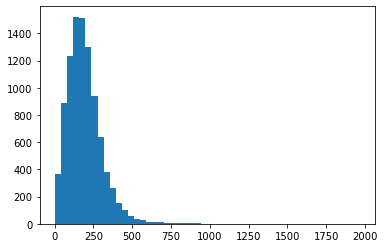

In [64]:
plt.hist(n_per, bins = 50)

In [69]:
(n_per > 100).mean()

0.8065059479945257

(array([1.376e+03, 1.425e+03, 1.386e+03, 1.129e+03, 8.380e+02, 5.170e+02,
        3.130e+02, 2.290e+02, 1.600e+02, 8.600e+01, 5.700e+01, 3.500e+01,
        2.800e+01, 1.800e+01, 9.000e+00, 1.200e+01, 7.000e+00, 4.000e+00,
        9.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 101.  ,  138.24,  175.48,  212.72,  249.96,  287.2 ,  324.44,
         361.68,  398.92,  436.16,  473.4 ,  510.64,  547.88,  585.12,
         622.36,  659.6 ,  696.84,  734.08,  771.32,  808.56,  845.8 ,
         883.04,  920.28,  957.52,  994.76, 1032.  , 1069.24, 1106.48,
        1143.72, 1180.96, 1218.2 , 1255.44, 1292.68, 1329.92, 1367.16,
        1404.4 , 1441

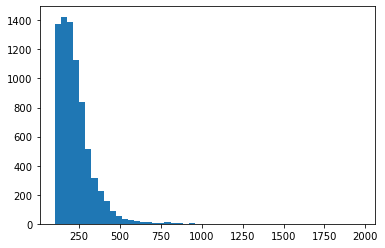

In [70]:
plt.hist(n_per[n_per > 100], bins = 50)

In [71]:
n_per

RPL3       1963
PINK1      1745
DUSP9      1351
RAP1GAP    1270
SIMC1      1170
           ... 
FECH          6
ZNF830        5
OGDH          4
LIG1          3
ZNF774        2
Length: 9499, dtype: int64

In [73]:
usedata = adata.X
trt_list = np.load(os.path.join('.', 'onehot/UniqueGenePerturbGene.npy'), allow_pickle=True)
## meta information
input_ltpm_label = adata.obs
perturb_with_onehot_overall = np.array(list(input_ltpm_label['gene']))

## with onehot
data_perturb_set = set(trt_list)
indicesWithOnehot = np.isin(perturb_with_onehot_overall, trt_list)

In [75]:
indicesWithOnehot.sum()

1844208

In [81]:
perturb_with_onehot = perturb_with_onehot_overall[indicesWithOnehot]

removed_all_pers = np.load(
    os.path.join('.', 'onehot/Genomewide_1000RemovedPerturbs.npy'),
    allow_pickle = True)
removed_all_pers_set = set(removed_all_pers)
kept_indices = [i for i in range(len(perturb_with_onehot)) if perturb_with_onehot[i] not in removed_all_pers_set]

In [82]:
len(kept_indices)

1652893

In [80]:
removed_all_pers_set.shape

AttributeError: 'set' object has no attribute 'shape'

# data scales

In [6]:
adata = ad.read_h5ad('K562_gwps_normalized_singlecell_01_genesFiltered.h5ad')

In [7]:
x_data = adata.X

(array([[1989578.,       0.,       0., ...,       0.,       0.,       0.],
        [1989578.,       0.,       0., ...,       0.,       0.,       0.],
        [1989578.,       0.,       0., ...,       0.,       0.,       0.],
        ...,
        [1989578.,       0.,       0., ...,       0.,       0.,       0.],
        [1989578.,       0.,       0., ...,       0.,       0.,       0.],
        [1989578.,       0.,       0., ...,       0.,       0.,       0.]]),
 array([-1.28424000e-02,  2.62578934e-01,  5.38000286e-01,  8.13421607e-01,
         1.08884299e+00,  1.36426425e+00,  1.63968563e+00,  1.91510701e+00,
         2.19052839e+00,  2.46594954e+00,  2.74137092e+00,  3.01679230e+00,
         3.29221368e+00,  3.56763506e+00,  3.84305644e+00,  4.11847782e+00,
         4.39389896e+00,  4.66932011e+00,  4.94474173e+00,  5.22016287e+00,
         5.49558449e+00,  5.77100563e+00,  6.04642725e+00,  6.32184839e+00,
         6.59726954e+00,  6.87269115e+00,  7.14811230e+00,  7.42353392e+00,
   

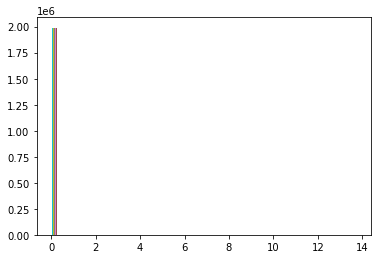

In [8]:
plt.hist(x_data, bins = 50)

In [9]:
x_data.min()

-0.0128424

In [10]:
x_data.max()

13.7582245

In [12]:
x_data.var(0)

array([4.1613230e-06, 4.1473199e-06, 4.1560165e-06, ..., 4.2018851e-06,
       4.7022208e-06, 4.1824419e-06], dtype=float32)

(array([1.995e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([4.0554605e-06, 1.0064953e-05, 1.6074446e-05, 2.2083937e-05,
        2.8093431e-05, 3.4102923e-05, 4.0112416e-05, 4.6121906e-05,
        5.2131400e-05, 5.8140893e-05, 6.4150387e-05, 7.0159876e-05,
        7.6169374e-05, 8.2178864e-05, 8.8188353e-05, 9.4197851e-05,
        1.0020734e-04, 1.0621683e-04, 1.1222633e-04, 1.1823582e-04,
        1.2424531e-04, 1.3025480e-04

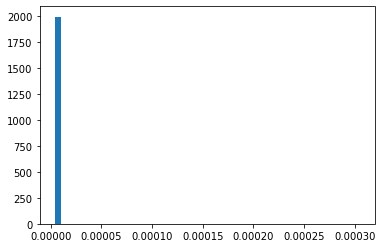

In [28]:
plt.hist(x_data.var(0), bins = 50)

In [13]:
high_genes = pd.read_csv('selected_gwps_normalized_singlecell_01.csv')


In [19]:
adata = ad.read_h5ad('K562_gwps_normalized_singlecell_01.h5ad')

In [20]:
high_gene_list = list(high_genes['gene_id'])
high_genes['gene_id'].shape, high_genes['gene_id'].unique().shape

((2000,), (2000,))

In [24]:
gene_id = np.array(list(adata.var.index))
idx_high_gene = [np.where(gene_id == i)[0][0] for i in high_gene_list]

In [22]:
adata.var.index.unique().shape,adata.shape

((8248,), (1989578, 8248))

In [21]:
adata.var.head()

,gene_name,chr,start,end,class,strand,length,in_matrix,mean,std,cv,fano
gene_id,,,,,,,,,,,,
ENSG00000237491,LINC01409,chr1,778747,810065,gene_version10,+,31318,True,0.116626,0.349971,3.000803,1.050194
ENSG00000228794,LINC01128,chr1,825138,868202,gene_version9,+,43064,True,0.182850,0.437274,2.391434,1.045713
ENSG00000188976,NOC2L,chr1,944203,959309,gene_version11,-,15106,True,1.415674,1.397208,0.986957,1.378984
ENSG00000187961,KLHL17,chr1,960584,965719,gene_version14,+,5135,True,0.105599,0.330678,3.131439,1.035497
ENSG00000188290,HES4,chr1,998962,1000172,gene_version10,-,1210,True,0.242700,0.550596,2.268630,1.249098


In [26]:
adata = adata[:, idx_high_gene].copy()
adata.shape

(1989578, 2000)

In [27]:
adata.write('K562_gwps_normalized_singlecell_01_genesFilteredPert.h5ad')

In [30]:
adata.X.max(), adata.X.min()

(6879.1123, -6.4212)

In [34]:
adata.obs['gem_group'].unique()

array([157, 207,  29, 149, 172, 215, 209,  54, 228,  48,   9,  53,  60,
        12, 247, 271,  82, 111, 148, 125, 137,  36, 121, 255,  69, 110,
         2,  37,   7, 223, 265,  89, 144, 232,  84, 165,  73, 258,  45,
       155, 190, 201, 128, 135,   3, 158, 221, 143, 264,  46,  93,  17,
       183, 262,  22, 132, 159, 114,  28, 256, 161, 185,  11, 273,  75,
       136,  83, 181,  86, 220,  18, 250,  74, 146,  27, 101, 129,  61,
       267, 168, 243, 171, 238, 235, 226, 109, 124, 240,  55, 108, 242,
       192, 210, 170, 112,  34, 177, 213, 260, 119, 162, 182, 225,  20,
        23, 222,  32,  91, 244, 248, 160, 164,  40,  99, 120,  78,  85,
       134,  50,  96, 118, 103,  31,  39,  67, 138, 126,  42, 216, 219,
       167,  43,  80,   8,  79,  63, 234,   6,  94, 186, 117, 227,  47,
        25, 102, 105, 233, 252, 230,  62, 106, 174, 145,  95, 176,  64,
        35,  15,  33, 253, 104,  72,  14, 239, 113, 193, 212,  21, 184,
        92, 150, 173,   5,  24, 194,  44, 263, 272, 236,  87, 19

## Process the count data

In [8]:
adata = ad.read_h5ad('K562_gwps_raw_singlecell_01.h5ad')

In [9]:
adata.shape

(1989578, 8248)

In [9]:
adata.X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 4., ..., 0., 0., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [2., 0., 2., ..., 1., 0., 1.]], dtype=float32)

In [11]:
batch_freq = adata.obs['gem_group'].value_counts()

In [15]:
mean_0 = adata.X.mean(0)

In [16]:
idx_nan = np.where(np.isnan(mean_0))[0]
idx_notnan = np.setdiff1d(list(range(adata.shape[1])), idx_nan)
len(idx_nan), len(idx_notnan)

(0, 8248)

In [ ]:
x_data = adata.X
x_data = sparse.csr_matrix(x_data)

In [ ]:

var_data = adata.var
obs_data = adata.obs

adata = AnnData(X = x_data, var = var_data, obs = obs_data)

In [10]:
sc.settings.verbosity = 3
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 7.2.0
astunparse          1.6.3
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                2.10.0
ipykernel           5.3.2
ipython_genutils    0.2.0
ipywidge

normalizing counts per cell
    finished (0:00:55)


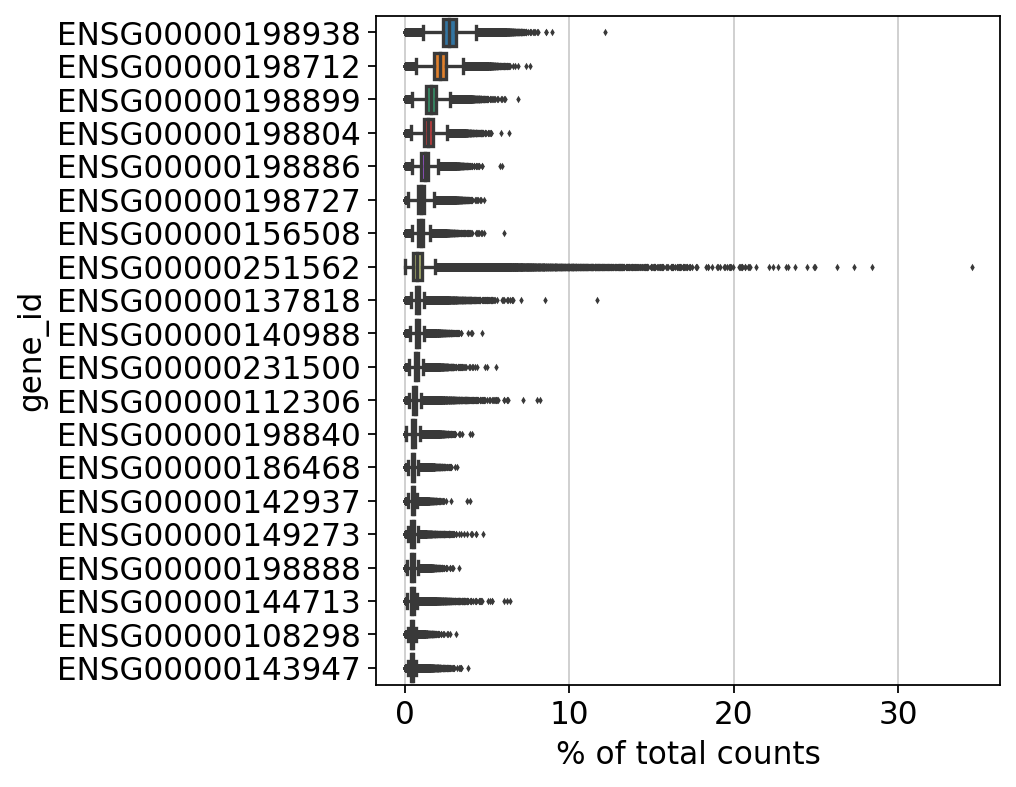

In [11]:
sc.settings.set_figure_params(dpi=80)
sc.pl.highest_expr_genes(adata, n_top = 20)

In [12]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

In [13]:
adata.shape

(1989578, 8248)

In [14]:
adata.X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 4., ..., 0., 0., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [2., 0., 2., ..., 1., 0., 1.]], dtype=float32)

In [15]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata


AttributeError: 'numpy.ndarray' object has no attribute 'A1'

In [16]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
(adata.obs['n_genes'] < 6000).sum(), (adata.obs['percent_mito'] < 0.1).sum()

(1989373, 1989578)

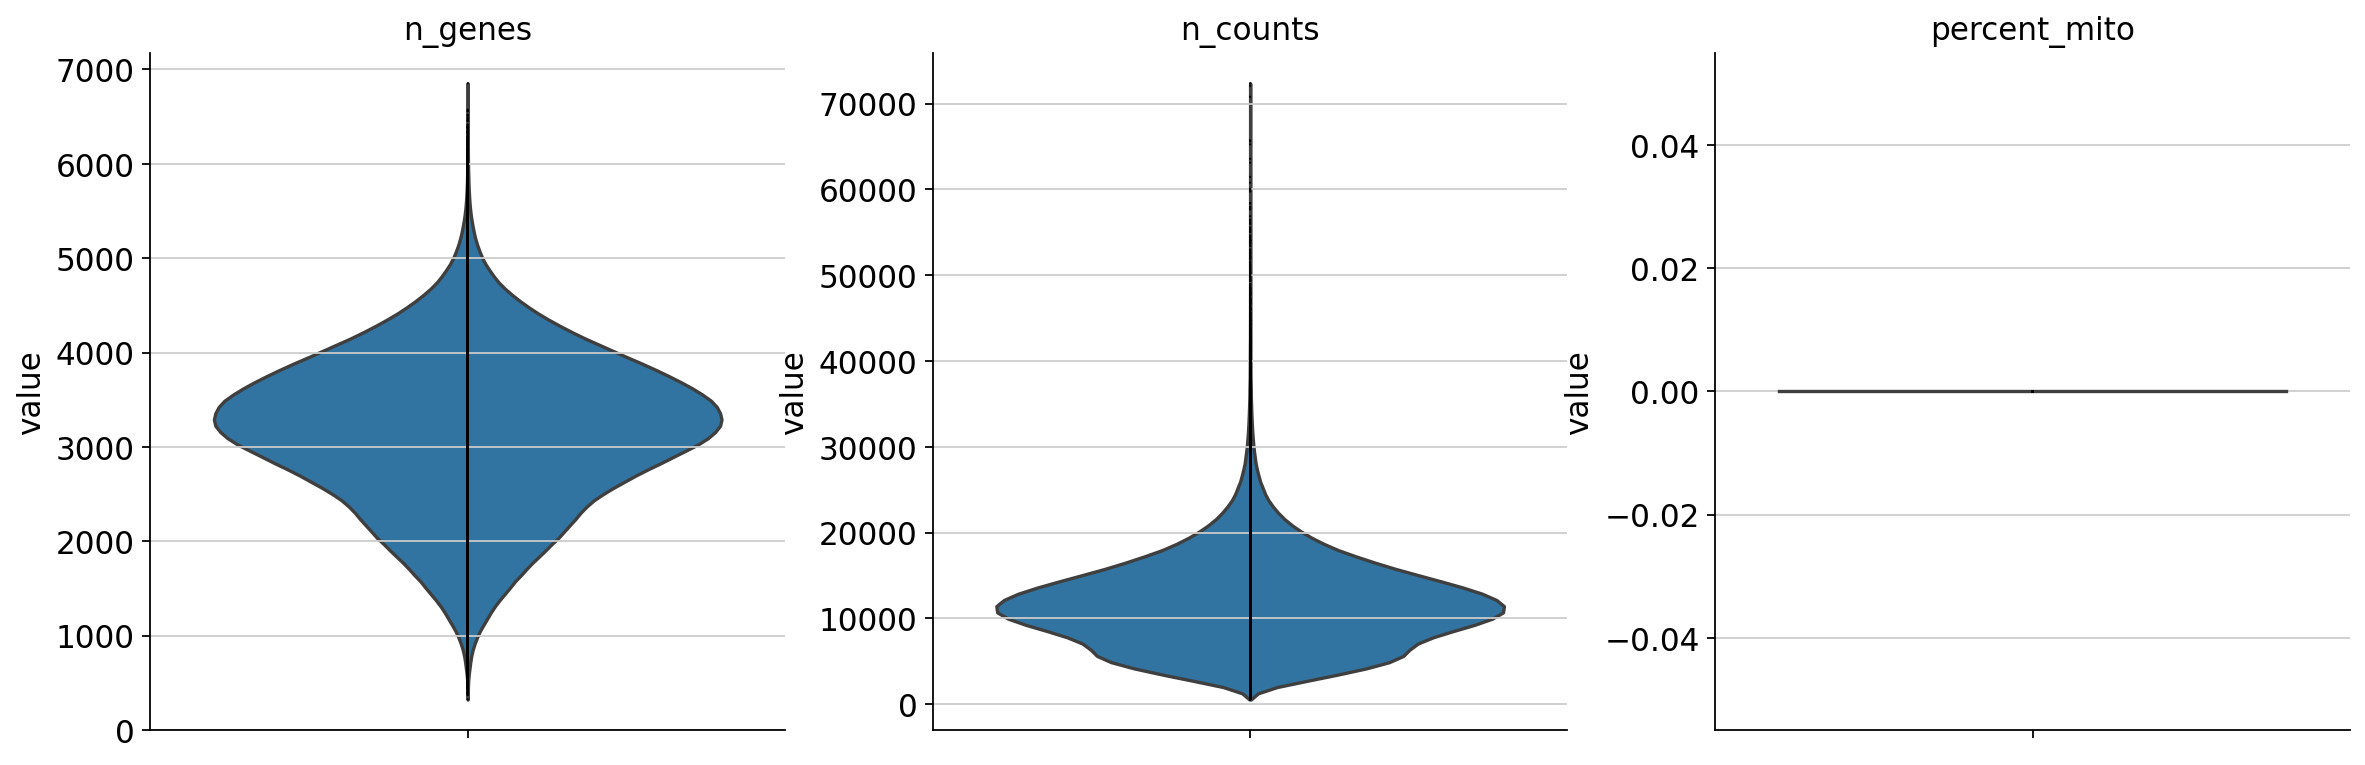

In [17]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

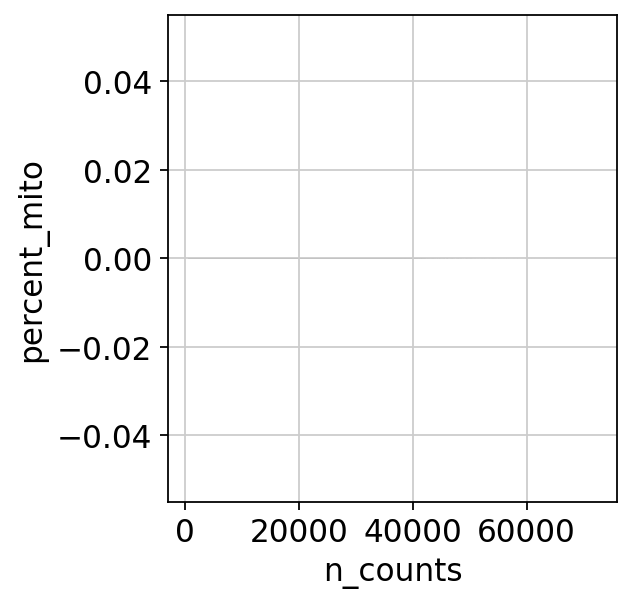

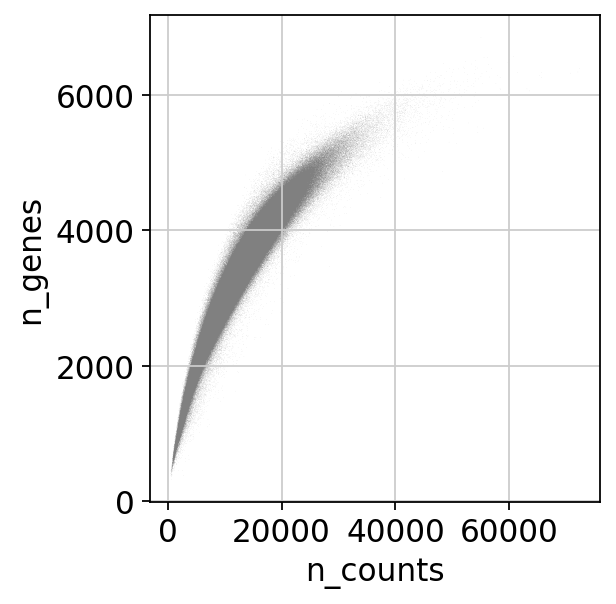

In [18]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [19]:
(adata.obs['n_genes'] < 6000).sum(), (adata.obs['percent_mito'] < 0.1).sum()

(1989373, 1989578)

In [20]:
adata.obs.head()

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,core_scale_factor,core_adjusted_UMI_count,n_genes,percent_mito,n_counts
cell_barcode,,,,,,,,,,,,,,
AAACCCAAGAAACCAT-157,157,CTSC,ENSG00000109861,P1P2,1946_CTSC_P1P2_ENSG00000109861,CTSC_-_88070848.23-P1P2|CTSC_-_88070918.23-P1P2,0.088177,14709.0,0.470687,1.051176,13992.900391,3440,0.0,14506.0
AAACCCAAGAAACCAT-207,207,CWC25,ENSG00000273559,P1P2,1973_CWC25_P1P2_ENSG00000273559,CWC25_+_36981555.23-P1P2|CWC25_+_36981567.23-P1P2,0.114342,16162.0,0.824790,1.074744,15038.004883,3872,0.0,15883.0
AAACCCAAGAAACCAT-29,29,PDE4DIP,ENSG00000178104,ENST00000313431.9,6168_PDE4DIP_ENST00000313431.9_ENSG00000178104,PDE4DIP_+_144932474.23-ENST00000313431.9|PDE4D...,0.107157,33297.0,2.627126,1.472444,22613.423828,5452,0.0,32720.0
AAACCCAAGAAAGCGA-149,149,ZZEF1,ENSG00000074755,P1P2,10745_ZZEF1_P1P2_ENSG00000074755,ZZEF1_+_4046247.23-P1P2|ZZEF1_+_4046255.23-P1P2,0.143107,7435.0,0.918149,0.480401,15476.669922,2551,0.0,7336.0
AAACCCAAGAAATCCA-172,172,SNAPIN,ENSG00000143553,P1P2,8210_SNAPIN_P1P2_ENSG00000143553,SNAPIN_+_153631238.23-P1P2|SNAPIN_-_153631252....,0.130754,7755.0,-0.230920,0.695649,11147.856445,2562,0.0,7632.0


In [21]:
adata.obs.index.unique().shape, adata.shape

((1989578,), (1989578, 8248))

In [22]:
adata = adata[adata.obs['percent_mito'] < 0.1, :]
adata = adata[adata.obs['n_genes'] < 6000, :]
adata.shape

(1989373, 8248)

In [23]:
adata.write('K562_gwps_raw_singlecell_01_BeforeNormalize.h5ad')

### select highly variable gene

In [24]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)
sc.pp.log1p(adata)
adata.raw = adata

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:04:34): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [29]:
adata.obs['gem_group']  = adata.obs.gem_group.astype('category')


In [30]:
sc.pp.highly_variable_genes(
    adata, batch_key="gem_group", min_mean=0.0125, max_mean=5, min_disp=0.5
)



extracting highly variable genes
    finished (0:10:43)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [31]:
highvar_gene = np.where(adata.var['highly_variable'])[0]
np.save('K562_gwps_raw_singlecell_01_high_genes.npy', highvar_gene)
highvar_gene.shape

(706,)

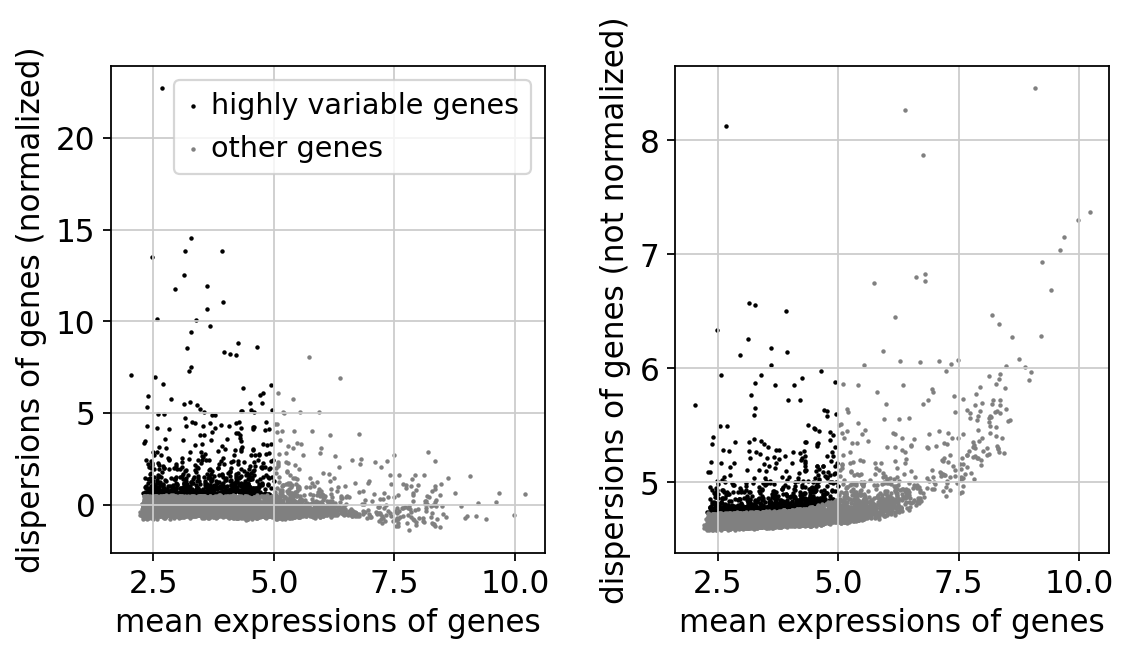

In [32]:
sc.pl.highly_variable_genes(adata)

In [8]:
adata = ad.read_h5ad('K562_gwps_raw_singlecell_01_BeforeNormalize.h5ad')

In [9]:
highvar_gene = np.load('K562_gwps_raw_singlecell_01_high_genes.npy')

In [10]:
adata.layers["counts"] = adata.X.copy()

In [13]:
adata = adata[:, highvar_gene]

In [14]:
adata.layers[
    'counts'
].shape

(1989373, 706)

In [15]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata


/home/hengshi/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


AttributeError: Can only use .cat accessor with a 'category' dtype

In [16]:
adata.obs['gem_group']  = adata.obs.gem_group.astype('category')
sc.pp.highly_variable_genes(adata, batch_key="gem_group", min_mean=0.0125, max_mean=3, min_disp=0.5)

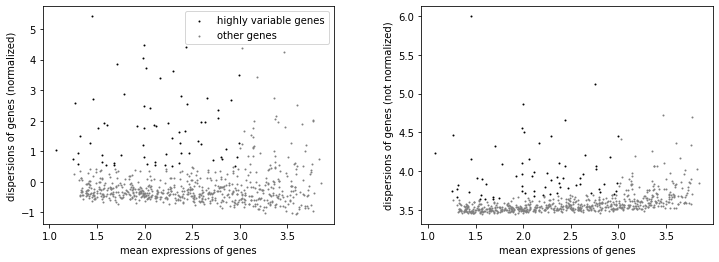

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
adata.var.highly_variable.sum()

67

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
adata.write('K562_gwps_raw_singlecell_01_processed.h5ad')

###  perturbation

In [8]:
adata = ad.read_h5ad('K562_gwps_raw_singlecell_01_processed.h5ad')

In [10]:
adata_norm = ad.read_h5ad('K562_gwps_normalized_singlecell_01_genesFilteredValueUnchanged.h5ad')

In [11]:
adata.shape, adata_norm.shape

((1989373, 706), (1989578, 2000))

In [12]:
perturb_arr = np.array(list(adata.obs['gene']))
perturb_uni = np.unique(perturb_arr)

In [18]:
perturb_arr_norm = np.array(list(adata_norm.obs['gene']))
perturb_uni_norm = np.unique(perturb_arr_norm)

In [14]:
perturb_uni_lib = np.load('onehot/UniqueGenePerturbGene.npy')

In [17]:
set(perturb_uni) - set(perturb_uni_lib)

{'AARS',
 'AC015871.1',
 'AC118549.1',
 'ACAP3',
 'ADPRHL2',
 'ADSS',
 'AHSA2',
 'AMZ2',
 'ANKMY1',
 'ANKRD33B',
 'ANKRD36',
 'ANKRD36C',
 'ANKRD46',
 'ARPC4-TTLL3',
 'ASNSD1',
 'ATF7IP2',
 'B3GNTL1',
 'BAHCC1',
 'BCL7C',
 'C10orf88',
 'C11orf58',
 'C11orf74',
 'C11orf80',
 'C11orf96',
 'C12orf29',
 'C12orf43',
 'C12orf45',
 'C12orf49',
 'C12orf73',
 'C12orf76',
 'C14orf178',
 'C15orf41',
 'C15orf61',
 'C16orf58',
 'C16orf86',
 'C16orf91',
 'C16orf95',
 'C17orf49',
 'C17orf53',
 'C18orf21',
 'C19orf48',
 'C19orf53',
 'C19orf54',
 'C19orf81',
 'C1orf122',
 'C1orf159',
 'C1orf35',
 'C1orf53',
 'C1orf56',
 'C1orf61',
 'C20orf203',
 'C20orf27',
 'C20orf96',
 'C21orf58',
 'C21orf91',
 'C22orf46',
 'C2orf69',
 'C4orf3',
 'C4orf36',
 'C4orf48',
 'C5orf15',
 'C5orf30',
 'C5orf34',
 'C6orf136',
 'C6orf52',
 'C6orf62',
 'C7orf26',
 'C8orf76',
 'C8orf82',
 'C9orf40',
 'C9orf85',
 'CARS',
 'CASC4',
 'CCDC127',
 'CCDC138',
 'CCDC142',
 'CCDC144A',
 'CCDC144NL',
 'CCDC169',
 'CCDC169-SOHLH2',
 'CCDC

In [22]:
set(perturb_uni) - set(perturb_uni_norm)

set()

In [20]:
perturb_uni_norm

array(['A1BG', 'AAAS', 'AACS', ..., 'ZYX', 'ZZEF1', 'non-targeting'],
      dtype='<U14')

In [23]:
set(perturb_uni_norm) - set(perturb_uni)

set()

In [25]:
a = np.isin([1,2,3], [1,3,4,5, 3])

In [27]:
np.where(a)[0]

array([0, 2])

## filter 2000 top genes rather than threshold values

In [8]:
adata = ad.read_h5ad('K562_gwps_raw_singlecell_01_BeforeNormalize.h5ad')

In [9]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)
sc.pp.log1p(adata)
adata.raw = adata
adata.obs['gem_group']  = adata.obs.gem_group.astype('category')


In [10]:
sc.pp.highly_variable_genes(
    adata, batch_key="gem_group",  n_top_genes=2000
)


/sw/arcts/centos7/python3.8-anaconda/2020.07/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
highvar_gene = np.where(adata.var['highly_variable'])[0]
np.save('K562_gwps_raw_singlecell_01_high_genes_top2000.npy', highvar_gene)
highvar_gene.shape

(2000,)

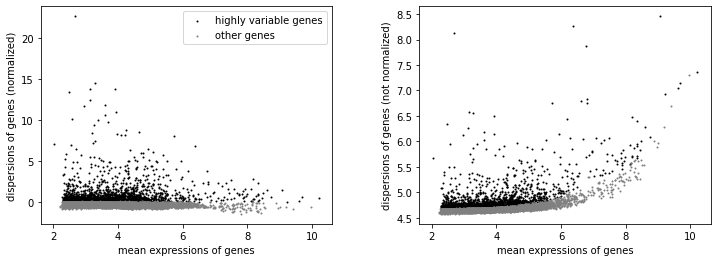

In [12]:
sc.pl.highly_variable_genes(adata)

In [8]:
adata = ad.read_h5ad('K562_gwps_raw_singlecell_01_BeforeNormalize.h5ad')

In [9]:
highvar_gene = np.load('K562_gwps_raw_singlecell_01_high_genes_top2000.npy')

In [10]:
adata.layers["counts"] = adata.X.copy()

In [11]:
adata = adata[:, highvar_gene].copy()

In [12]:
adata.layers['counts'].shape

(1989373, 2000)

In [13]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
adata.obs['gem_group']  = adata.obs.gem_group.astype('category')
sc.pp.highly_variable_genes(adata, batch_key="gem_group", min_mean=0.0125, max_mean=3, min_disp=0.5)

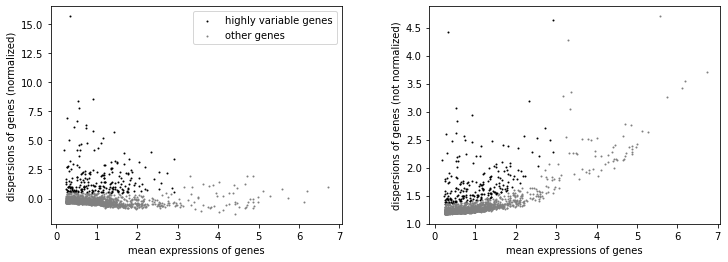

In [14]:
sc.pl.highly_variable_genes(adata)

In [15]:
adata.var.highly_variable.sum()

220

In [16]:
sc.pp.scale(adata, max_value=10)

In [17]:
adata.write('K562_gwps_raw_singlecell_01_processed_2000TopGenes.h5ad')